<a href="https://colab.research.google.com/github/BeyzaYavas/Deep-Learning-Application-/blob/main/Bitirme_Tezi_Son.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Paris'teki Ev Fiyatları Veri Seti Üzerinde Bir Derin Öğrenme Uygulaması**

**1. Veri Setini Anlama**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import preprocessing    #Label encoder için 
from sklearn.model_selection import train_test_split   # veri setini ayırma
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix 

from tensorflow.keras.models import Sequential #YSA  için 
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


In [ ]:
df = pd.read_csv("/content/ParisHousingClass.csv")

In [ ]:
df.head(10) 

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury
5,39223,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3926647.2,Basic
6,58682,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.5,Luxury
7,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.3,Basic
8,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.2,Basic
9,39686,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3970892.1,Basic


In [ ]:
df.tail(10)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
9990,5537,65,0,1,24,5808,8,6,2012,0,1,3974,5726,762,0,2,560359.2,Basic
9991,96173,12,1,0,36,36812,7,7,2015,1,1,837,3716,564,0,9,9623811.5,Basic
9992,33545,55,0,1,79,8288,1,2,2006,1,0,3480,4046,946,1,6,3361070.6,Basic
9993,341,83,0,0,8,1960,4,4,1993,1,1,2366,4016,229,1,5,35371.3,Basic
9994,21514,5,0,1,11,91373,1,1,1999,0,0,2584,5266,787,0,3,2153602.9,Basic
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,Basic
9999,1440,84,0,0,49,18412,6,10,1994,1,0,8485,2024,278,1,6,146708.4,Basic


In [ ]:
df.size

180000

In [ ]:
#veri seti 10000 satır, 18 sütundan oluşmaktadır
df.shape 

(10000, 18)

In [ ]:
df.dtypes

squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
category              object
dtype: object

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [ ]:
#herhangi bir değişkende null olan değerler bulunmamakta
df.isnull().sum() 

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [ ]:
#veri setinde  duplike yani çoğaltılmış veriler bulunmuyor
df.duplicated().sum()

0

In [ ]:
#nümerik görünümlü kategorik değişkenlerin hangileri olduğu anlaşılmakla beraber nümerik değişkenler genel anlamda veride dengeli dağılmıştır. 
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
squareMeters,10000.0,4.987013e+04,2.877438e+04,89.0,25098.50,50105.5,74609.75,99999.0
numberOfRooms,10000.0,5.035840e+01,2.881670e+01,1.0,25.00,50.0,75.00,100.0
hasYard,10000.0,5.087000e-01,4.999493e-01,0.0,0.00,1.0,1.00,1.0
hasPool,10000.0,4.968000e-01,5.000148e-01,0.0,0.00,0.0,1.00,1.0
floors,10000.0,5.027630e+01,2.888917e+01,1.0,25.00,50.0,76.00,100.0
cityCode,10000.0,5.022549e+04,2.900668e+04,3.0,24693.75,50693.0,75683.25,99953.0
cityPartRange,10000.0,5.510100e+00,2.872024e+00,1.0,3.00,5.0,8.00,10.0
numPrevOwners,10000.0,5.521700e+00,2.856667e+00,1.0,3.00,5.0,8.00,10.0
made,10000.0,2.005488e+03,9.308090e+00,1990.0,1997.00,2005.5,2014.00,2021.0
isNewBuilt,10000.0,4.991000e-01,5.000242e-01,0.0,0.00,0.0,1.00,1.0


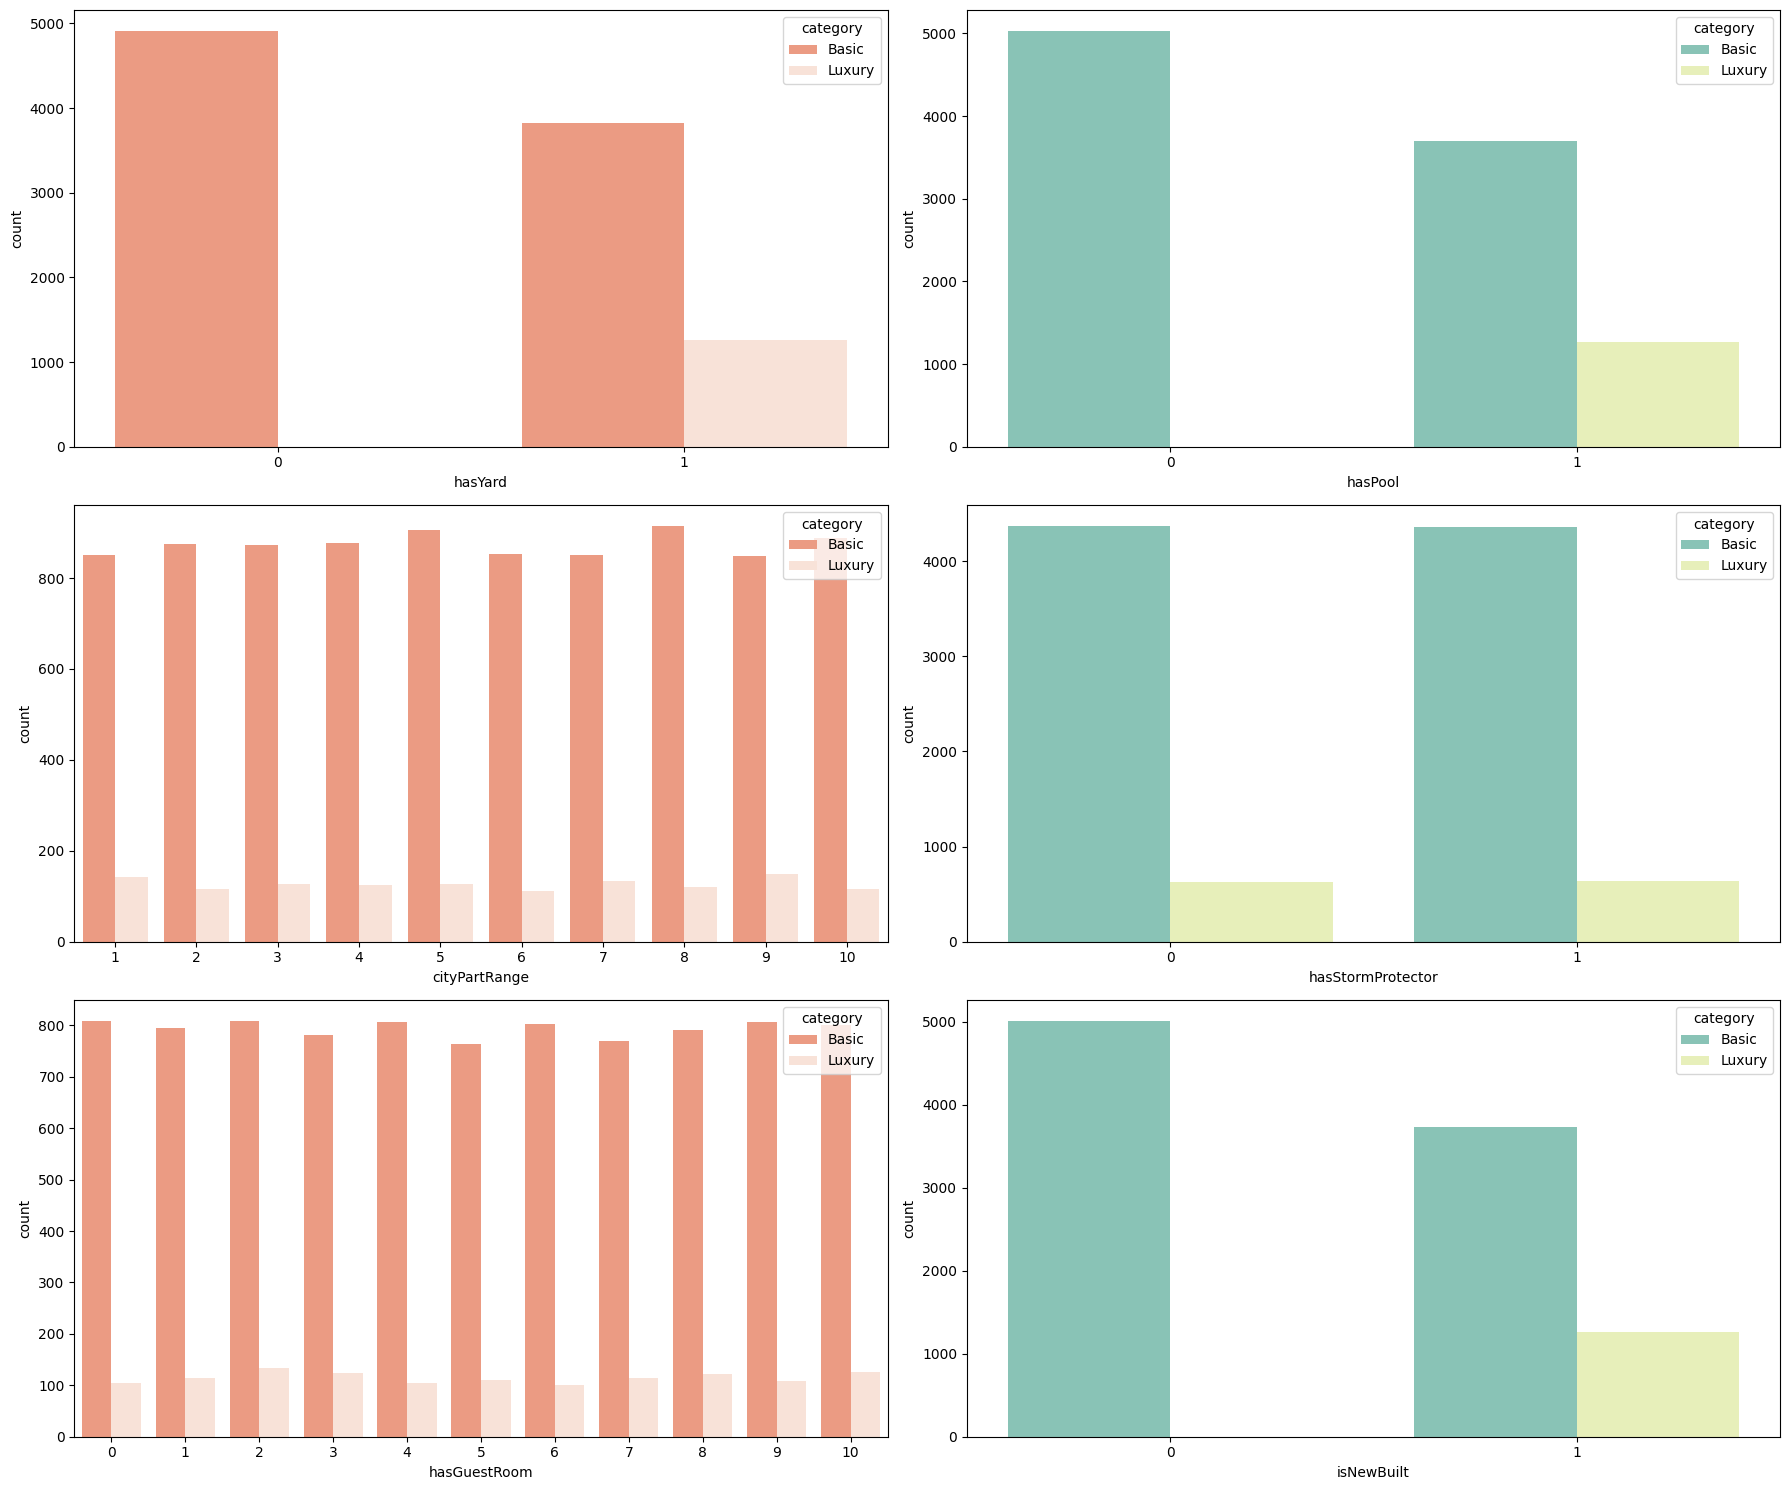

In [ ]:
# kategorik değişkenleri görselleştirme

fig, ax = plt.subplots(3, 2, figsize = (18, 15))

sns.countplot(x = 'hasYard', hue = 'category', data = df, palette =["#fc9272","#fee0d2"],  ax = ax[0][0])
sns.countplot(x = 'hasPool', hue = 'category', data = df, palette=["#7fcdbb","#edf8b1"], ax = ax[0][1])
sns.countplot(x = 'cityPartRange', hue = 'category', data = df, palette =["#fc9272","#fee0d2"], ax = ax[1][0])
sns.countplot(x = 'hasStormProtector', hue = 'category', data = df, palette=["#7fcdbb","#edf8b1"], ax = ax[1][1])
sns.countplot(x = 'hasGuestRoom', hue = 'category', data = df, palette =["#fc9272","#fee0d2"], ax = ax[2][0])
sns.countplot(x = 'isNewBuilt', hue = 'category', data = df, palette=["#7fcdbb","#edf8b1"], ax = ax[2][1])

plt.tight_layout()
plt.show()

In [ ]:
data1 = df.groupby('cityPartRange').agg({'squareMeters':'mean',
'numberOfRooms' : 'mean',       
'hasYard' : 'mean',       
'hasPool': 'mean',
'price' : 'mean',
'numPrevOwners' : 'mean',
'hasGuestRoom' : 'mean'}) 

In [ ]:
data1.sort_values(ascending = 0, by = 'squareMeters')

,squareMeters,numberOfRooms,hasYard,hasPool,price,numPrevOwners,hasGuestRoom
cityPartRange,,,,,,,
8,50754.610628,51.823188,0.515942,0.496618,5.082120e+06,5.560386,4.861836
7,50630.131098,50.652439,0.517276,0.526423,5.069665e+06,5.679878,5.082317
5,50534.548982,49.993210,0.506305,0.489816,5.059792e+06,5.392823,5.064016
3,50197.966967,49.667668,0.513514,0.462462,5.026029e+06,5.503504,5.088088
6,49836.503627,49.786528,0.508808,0.504663,4.990101e+06,5.551295,5.051813
10,49719.596614,50.985060,0.494024,0.498008,4.978567e+06,5.570717,4.926295
9,49480.372116,49.695085,0.518556,0.512538,4.954627e+06,5.482447,4.960883
4,49265.941059,49.846154,0.515485,0.486513,4.932945e+06,5.454545,5.012987
2,49256.543434,51.737374,0.511111,0.486869,4.931873e+06,5.562626,4.866667


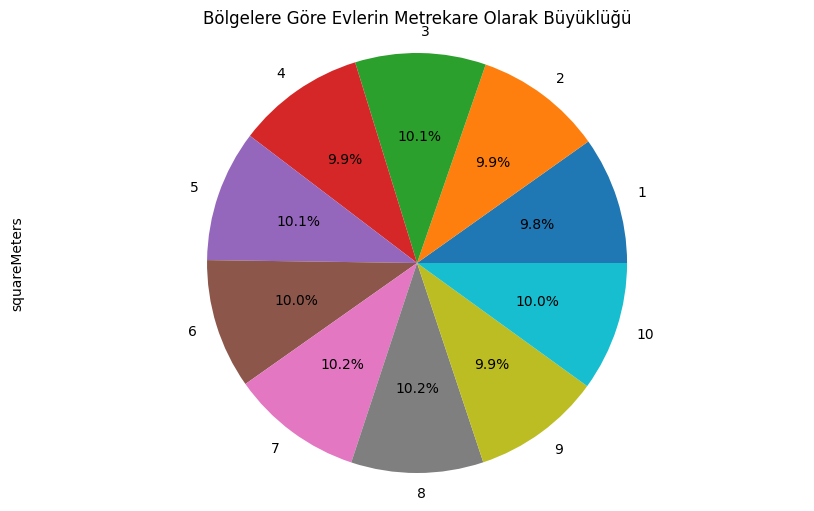

In [ ]:
data1['squareMeters'].plot(kind="pie", figsize=(10,6), autopct="%1.1f%%") 
plt.title("Bölgelere Göre Evlerin Metrekare Olarak Büyüklüğü")
plt.axis("equal")
plt.show()

In [ ]:
#korelasyon analizi

correlation = df.corr()
correlation

<ipython-input-16-38ff04bbea71>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
squareMeters,1.000000,0.009573,-0.006650,-0.005594,0.001109,-0.001541,0.008758,0.016619,-0.007207,-0.010667,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999
numberOfRooms,0.009573,1.000000,-0.011240,0.017015,0.022244,0.009040,0.008340,0.016766,0.003978,-0.002865,-0.001656,-0.013990,0.012061,0.023188,-0.004760,-0.015529,0.009591
hasYard,-0.006650,-0.011240,1.000000,0.015514,-0.000883,0.006760,0.005023,0.004279,0.002214,-0.008370,-0.007598,-0.008558,-0.003085,-0.004626,-0.009506,-0.007276,-0.006119
hasPool,-0.005594,0.017015,0.015514,1.000000,-0.004006,0.008072,0.014613,-0.006848,0.001894,0.000188,-0.001001,-0.007268,-0.011901,0.004832,0.001238,0.001123,-0.005070
floors,0.001109,0.022244,-0.000883,-0.004006,1.000000,0.002207,-0.004921,0.002463,0.005022,0.002458,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654
cityCode,-0.001541,0.009040,0.006760,0.008072,0.002207,1.000000,0.011334,-0.007549,0.009266,-0.000224,-0.004941,0.002652,-0.002019,-0.002208,0.002554,-0.003338,-0.001539
cityPartRange,0.008758,0.008340,0.005023,0.014613,-0.004921,0.011334,1.000000,0.009238,0.007748,-0.001874,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813
numPrevOwners,0.016619,0.016766,0.004279,-0.006848,0.002463,-0.007549,0.009238,1.000000,0.006858,-0.017420,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619
made,-0.007207,0.003978,0.002214,0.001894,0.005022,0.009266,0.007748,0.006858,1.000000,-0.001678,-0.000645,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210
isNewBuilt,-0.010667,-0.002865,-0.008370,0.000188,0.002458,-0.000224,-0.001874,-0.017420,-0.001678,1.000000,0.003200,-0.015986,0.020127,0.002749,0.007011,0.019895,-0.010643


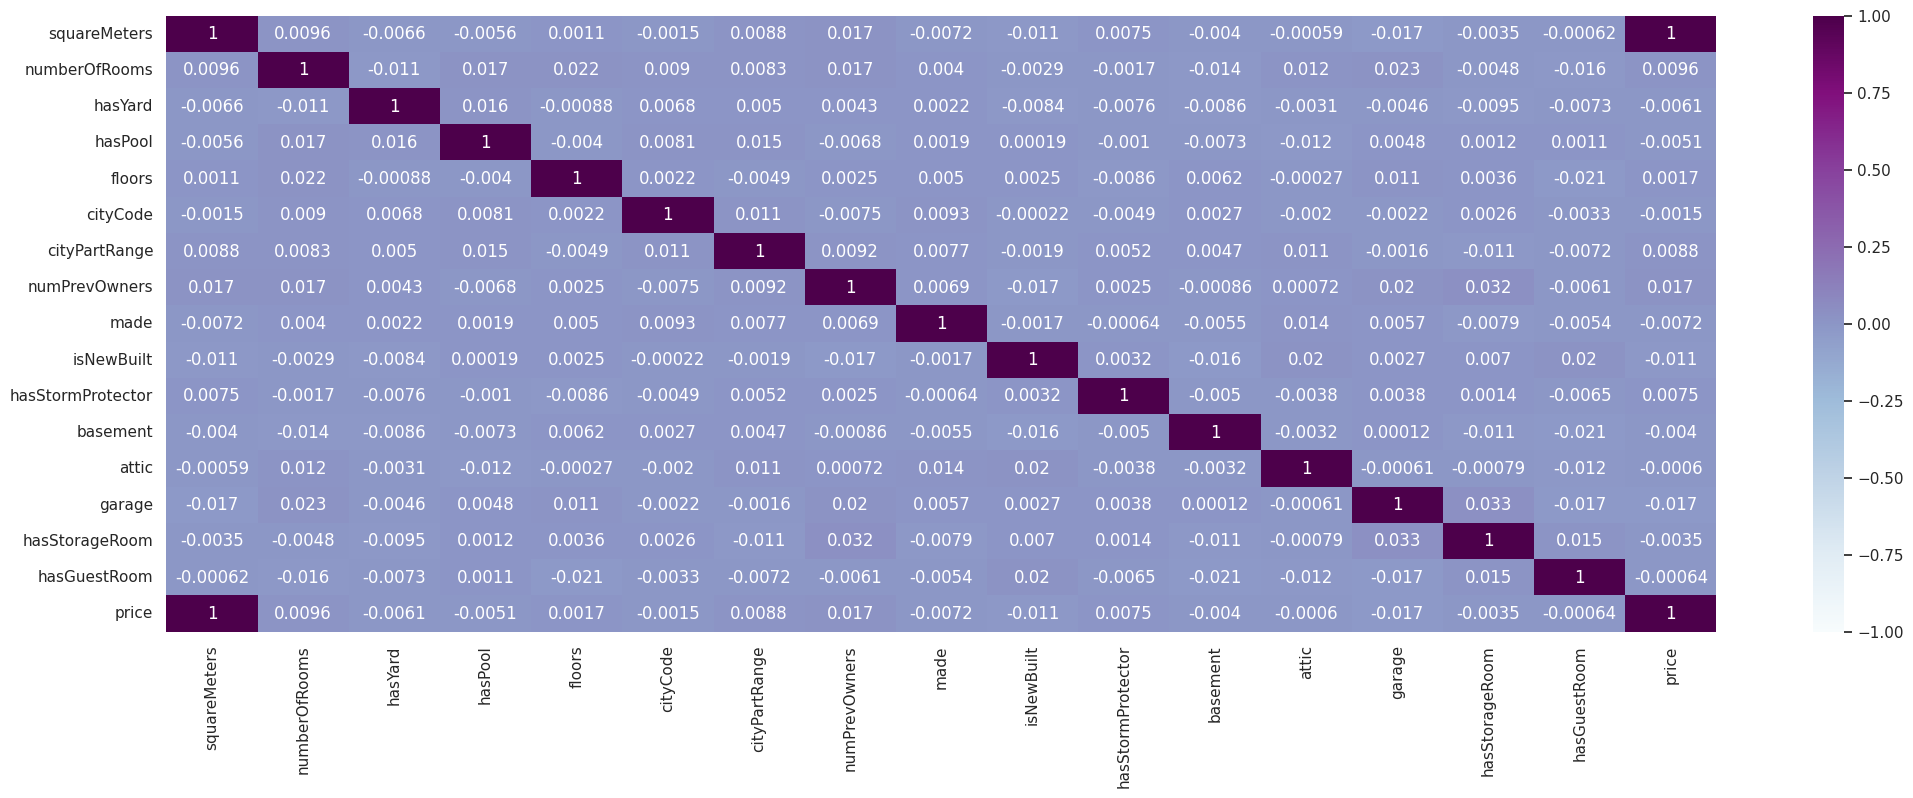

In [ ]:
#heatmap ile korelasyon analizini görselleştirme

sns.set(rc={"figure.figsize":(25,8)})
sns.heatmap(correlation, cmap="BuPu", vmin=-1, vmax=1, annot = True)
plt.show()



In [ ]:
#Sınıflandırma modeli için hedef değişkenin incelenmesi
df['category'].value_counts()

Basic     8735
Luxury    1265
Name: category, dtype: int64

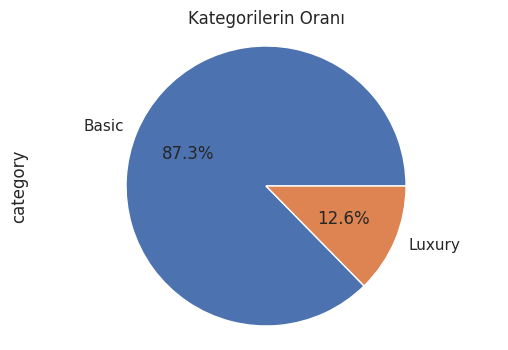

In [ ]:
df['category'].value_counts().plot(kind="pie", figsize=(6,4), autopct="%1.1f%%") 
plt.title("Kategorilerin Oranı")
plt.axis("equal")
plt.show()

# kategorilerde dengeli bir dağılım olmadığı görülmektedir

**2. Veri Setini Uygun Hale Getirme**

In [ ]:
# label_encoder hedef değişkenleri nümerik hale getirmeye yarar (mevcut sınıf sayısına göre )
#örneğimizde luxery ve basic olarak iki sınıf bulunduğu için 0 ve 1 atar.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'category'.
df['category']= label_encoder.fit_transform(df['category'])
  
df['category'].unique()

array([0, 1])

In [ ]:
df.head(5)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,1
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,0
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,0
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,1


**3. Fiyat Tahminleme Modeli Kurma**

In [ ]:
x_reg = df.drop('price', axis = 1).values
x_reg

array([[75523,     3,     0, ...,     0,     7,     0],
       [80771,    39,     1, ...,     1,     2,     1],
       [55712,    58,     0, ...,     1,     9,     0],
       ...,
       [83841,     3,     0, ...,     1,     9,     0],
       [59036,    70,     0, ...,     1,     4,     0],
       [ 1440,    84,     0, ...,     1,     6,     0]])

In [ ]:
y_reg = df['price'].values
y_reg

array([7559081.5, 8085989.5, 5574642.1, ..., 8390030.5, 5905107. ,
        146708.4])

In [ ]:
#veri setini test ve train olarak ayırma
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, 
                                                                    y_reg,
                                                                    test_size=0.25, 
                                                                    random_state=42)

In [ ]:
x_reg_test.shape

(2500, 17)

In [ ]:
x_reg_train.shape

(7500, 17)

In [ ]:
y_reg_test.shape

(2500,)

In [ ]:
y_reg_train.shape

(7500,)

In [ ]:
#değişkenleri boyut olarak uygun hale getirme
x_reg_train = np.array(x_reg_train)
x_reg_test = np.array(x_reg_test)
y_reg_train = np.array(y_reg_train)
y_reg_test = np.array(y_reg_test)

y_reg_test = y_reg_test.reshape(-1,1)
y_reg_train = y_reg_train.reshape(-1,1)

In [ ]:
y_reg_test.shape

(2500, 1)

In [ ]:
y_reg_train.shape

(7500, 1)

In [ ]:
x_reg_test

array([[79553,     7,     1, ...,     1,     1,     0],
       [37047,    79,     1, ...,     0,     5,     1],
       [85476,    36,     1, ...,     1,     7,     0],
       ...,
       [ 5399,    72,     0, ...,     0,    10,     0],
       [27423,    47,     0, ...,     1,     8,     0],
       [59972,    28,     0, ...,     1,     4,     0]])

In [ ]:
# verileri ölçeklendirme

scaler = MinMaxScaler()
x_reg_train = scaler.fit_transform(x_reg_train.astype(float))
x_reg_test = scaler.transform(x_reg_test.astype(float))

In [ ]:
x_reg_test

array([[0.79588955, 0.06060606, 1.        , ..., 1.        , 0.1       ,
        0.        ],
       [0.37016115, 0.78787879, 1.        , ..., 0.        , 0.5       ,
        1.        ],
       [0.85521268, 0.35353535, 1.        , ..., 1.        , 0.7       ,
        0.        ],
       ...,
       [0.0531835 , 0.71717172, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.27376982, 0.46464646, 0.        , ..., 1.        , 0.8       ,
        0.        ],
       [0.59977164, 0.27272727, 0.        , ..., 1.        , 0.4       ,
        0.        ]])

**3.1 Tahminleme: Birinci Model**

In [ ]:
# 1. model: 2 gizli katman ve 1 çıkış katmanı
def build_model(node1, node2, act_fonk, optimizer, loss, metric):

  model = Sequential() #YSA 
  model.add(Dense(node1,activation=act_fonk)) #gizli katman
  model.add(Dense(node2,activation=act_fonk)) #gizli katman
  model.add(Dense(1)) #çıkış katmanı

  model.compile(optimizer=optimizer, loss=loss, metrics = metric)

  return model

In [ ]:
# Veri setinde 18 özellik bulunmakta -> 18 nöronlu YSA  
pred_model1 = build_model(18,19, 'relu', 'Adam', 'mse', 'mae')

pred_model1.fit(x=x_reg_train, y=y_reg_train,
          validation_data=(x_reg_test,y_reg_test),
          batch_size=128,epochs=100)

pred_model1.summary()

Epoch 1/100
59/59 [==============================] - 1s 5ms/step - loss: 32789950889984.0000 - mae: 4963729.5000 - val_loss: 34483166248960.0000 - val_mae: 5082598.0000
Epoch 2/100
59/59 [==============================] - 0s 2ms/step - loss: 32789898461184.0000 - mae: 4963725.5000 - val_loss: 34483069779968.0000 - val_mae: 5082588.0000
Epoch 3/100
59/59 [==============================] - 0s 2ms/step - loss: 32789718106112.0000 - mae: 4963707.5000 - val_loss: 34482780372992.0000 - val_mae: 5082559.5000
Epoch 4/100
59/59 [==============================] - 0s 2ms/step - loss: 32789304967168.0000 - mae: 4963666.0000 - val_loss: 34482178490368.0000 - val_mae: 5082502.5000
Epoch 5/100
59/59 [==============================] - 0s 2ms/step - loss: 32788531118080.0000 - mae: 4963590.0000 - val_loss: 34481161371648.0000 - val_mae: 5082403.5000
Epoch 6/100
59/59 [==============================] - 0s 2ms/step - loss: 32787264438272.0000 - mae: 4963463.5000 - val_loss: 34479513010176.0000 - val_mae:

In [ ]:
#model performans metrikleri
y_reg_pred1 = pred_model1.predict(x_reg_test)

print('MAE:', metrics.mean_absolute_error(y_reg_test, y_reg_pred1))  
print('MSE:', metrics.mean_squared_error(y_reg_test, y_reg_pred1))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_reg_test, y_reg_pred1)))
print('VarScore:',metrics.explained_variance_score(y_reg_test, y_reg_pred1))

79/79 [==============================] - 0s 842us/step
MAE: 4238061.10344
MSE: 25742090673704.793
RMSE: 5073666.393615645
VarScore: 0.0185847582110491


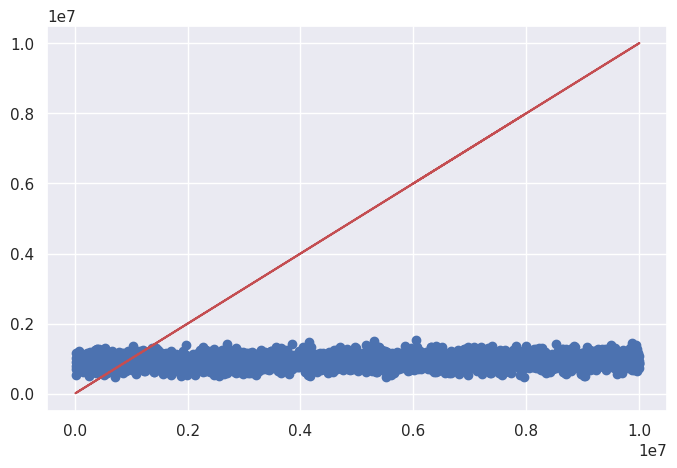

In [ ]:
#model tahmin değerleri ile gerçek değerlerin durumu
fig = plt.figure(figsize=(8,5))
plt.scatter(y_reg_test,y_reg_pred1)

plt.plot(y_reg_test,y_reg_test,'r')

**3.2 Tahminleme: İkinci Model**

In [ ]:
# 2. model: 4 gizli katman ve 1 çıkış katmanı
def build_model(node1, node2, act_fonk, optimizer, loss, metric):

  model = Sequential() #YSA 
  model.add(Dense(node1,activation=act_fonk)) #gizli katman
  model.add(Dense(node2,activation=act_fonk)) #gizli katman
  model.add(Dense(node2,activation=act_fonk)) #gizli katman
  model.add(Dense(node2,activation=act_fonk)) #gizli katman
  model.add(Dense(1)) #çıkış katmanı

  model.compile(optimizer=optimizer, loss=loss, metrics = metric)

  return model

In [ ]:
pred_model2 = build_model(18,19, 'relu', 'Adam', 'mse', 'mae')

pred_model2.fit(x=x_reg_train, y=y_reg_train,
          validation_data=(x_reg_test,y_reg_test),
          batch_size=128,epochs=100)

pred_model2.summary()

Epoch 1/100
59/59 [==============================] - 1s 4ms/step - loss: 32789946695680.0000 - mae: 4963729.5000 - val_loss: 34483151568896.0000 - val_mae: 5082595.5000
Epoch 2/100
59/59 [==============================] - 0s 2ms/step - loss: 32789732786176.0000 - mae: 4963708.0000 - val_loss: 34482453217280.0000 - val_mae: 5082528.0000
Epoch 3/100
59/59 [==============================] - 0s 2ms/step - loss: 32786538823680.0000 - mae: 4963392.5000 - val_loss: 34473647276032.0000 - val_mae: 5081675.5000
Epoch 4/100
59/59 [==============================] - 0s 2ms/step - loss: 32761851150336.0000 - mae: 4960940.5000 - val_loss: 34419922436096.0000 - val_mae: 5076478.5000
Epoch 5/100
59/59 [==============================] - 0s 2ms/step - loss: 32651803099136.0000 - mae: 4950004.5000 - val_loss: 34218096721920.0000 - val_mae: 5056946.0000
Epoch 6/100
59/59 [==============================] - 0s 2ms/step - loss: 32315136802816.0000 - mae: 4916293.0000 - val_loss: 33672134656000.0000 - val_mae:

In [ ]:
y_reg_pred2 = pred_model2.predict(x_reg_test)

print('MAE:', metrics.mean_absolute_error(y_reg_test, y_reg_pred2))  
print('MSE:', metrics.mean_squared_error(y_reg_test, y_reg_pred2))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_reg_test, y_reg_pred2)))
print('VarScore:',metrics.explained_variance_score(y_reg_test, y_reg_pred2))

79/79 [==============================] - 0s 831us/step
MAE: 50888.66403125001
MSE: 4437477646.517798
RMSE: 66614.3951899122
VarScore: 0.9995101507841437


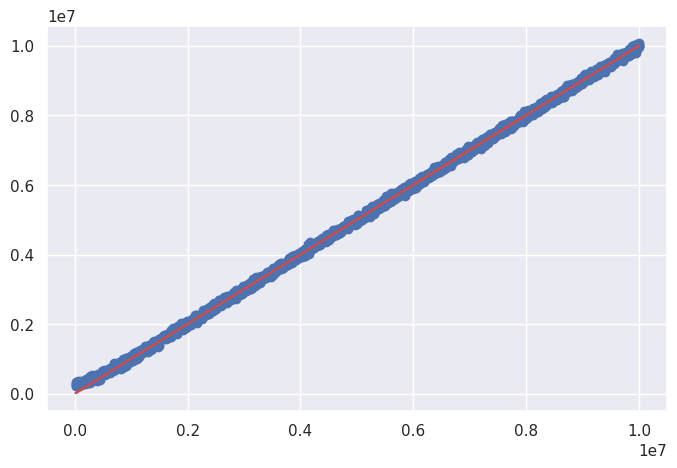

In [ ]:
#model tahmin değerleri ile gerçek değerlerin durumu
fig = plt.figure(figsize=(8,5))
plt.scatter(y_reg_test,y_reg_pred2)

plt.plot(y_reg_test,y_reg_test,'r')

**3.3 Tahminleme: Üçüncü Model**

In [ ]:
# 3. model: 2 gizli katman ve 1 çıkış katmanı 
def build_model(node1, node2, act_fonk, optimizer, loss, metric):

  model = Sequential() #YSA 
  model.add(Dense(node1,activation=act_fonk))
  model.add(Dense(node2,activation=act_fonk))
  model.add(Dense(1)) #çıkış katmanı

  model.compile(optimizer=optimizer, loss=loss, metrics = metric)

  return model

In [ ]:
# Gizli katman nöron sayısı -> 25
pred_model3 = build_model(18,25, 'relu', 'Adam', 'mse', 'mae')

pred_model3.fit(x=x_reg_train, y=y_reg_train,
          validation_data=(x_reg_test,y_reg_test),
          batch_size=128,epochs=100)

pred_model3.summary()

Epoch 1/100
59/59 [==============================] - 1s 4ms/step - loss: 32789940404224.0000 - mae: 4963729.5000 - val_loss: 34483151568896.0000 - val_mae: 5082596.0000
Epoch 2/100
59/59 [==============================] - 0s 2ms/step - loss: 32789856518144.0000 - mae: 4963720.5000 - val_loss: 34482969116672.0000 - val_mae: 5082579.0000
Epoch 3/100
59/59 [==============================] - 0s 2ms/step - loss: 32789514682368.0000 - mae: 4963687.0000 - val_loss: 34482398691328.0000 - val_mae: 5082523.0000
Epoch 4/100
59/59 [==============================] - 0s 2ms/step - loss: 32788677918720.0000 - mae: 4963604.5000 - val_loss: 34481186537472.0000 - val_mae: 5082407.5000
Epoch 5/100
59/59 [==============================] - 0s 2ms/step - loss: 32787100860416.0000 - mae: 4963448.0000 - val_loss: 34479089385472.0000 - val_mae: 5082206.0000
Epoch 6/100
59/59 [==============================] - 0s 2ms/step - loss: 32784548626432.0000 - mae: 4963194.0000 - val_loss: 34475830411264.0000 - val_mae:

In [ ]:
#model3 performans metrikleri
y_reg_pred3 = pred_model3.predict(x_reg_test)

print('VarScore:',metrics.explained_variance_score(y_reg_test, y_reg_pred3))

79/79 [==============================] - 0s 855us/step
VarScore: 0.029068602072601868


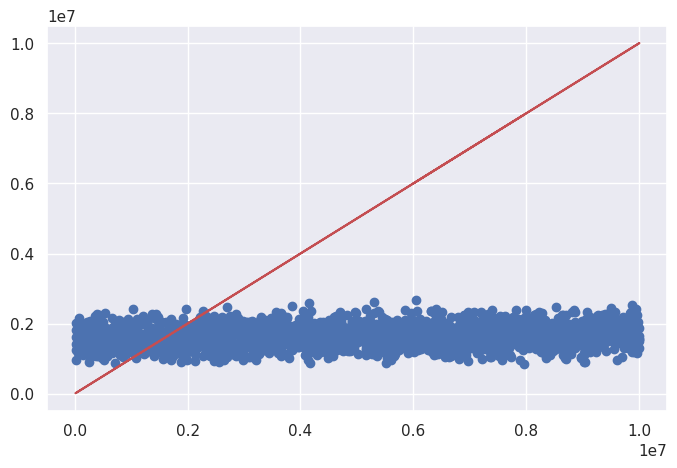

In [ ]:
#model tahmin değerleri ile gerçek değerlerin durumu
fig = plt.figure(figsize=(8,5))
plt.scatter(y_reg_test,y_reg_pred3)

plt.plot(y_reg_test,y_reg_test,'r')

**4. Ev Sınıflandırma Modeli Kurma**

In [ ]:
x_class = df.drop('category', axis = 1).values

y_class = df['category'].values

In [ ]:
x_class.shape

(10000, 17)

In [ ]:
y_class.shape

(10000,)

In [ ]:
#eğitim vs test 
x_class_train, x_class_test, y_class_train, y_class_test = train_test_split(x_class, y_class, test_size=0.25, random_state=42)

In [ ]:
#değişkenleri boyut olarak uygun hale getirme
x_class_train = np.array(x_class_train)
x_class_test = np.array(x_class_test)
y_class_train = np.array(y_class_train)
y_class_test = np.array(y_class_test)

y_class_test = y_class_test.reshape(-1,1)
y_class_train = y_class_train.reshape(-1,1)

In [ ]:
x_class_train.shape

(7500, 17)

In [ ]:
y_class_test.shape

(2500, 1)

**4.1 Sınıflandırma: Birinci Model**

In [ ]:
# Sınıflandırma model: 2 gizli katman 
def class_model(node1, node2, act_fonk_in, act_fonk_out, optimizer, loss, metric):

  model = Sequential()
  model.add(Dense(node1, activation=act_fonk_in))
  model.add(Dense(node2, activation=act_fonk_in))
  model.add(Dense(1, activation=act_fonk_out))

  # modeli compile etme
  model.compile(loss=loss, optimizer=optimizer, metrics=metric)
  return model

In [ ]:
#model1
c_model1 = class_model(18,18, 'relu', 'sigmoid', 'adam','binary_crossentropy','accuracy')

c_model1.fit(x=x_class_train, y=y_class_train,
          validation_data=(x_class_test,y_class_test),
          batch_size=128,epochs=100)
c_model1.summary()

Epoch 1/100
59/59 [==============================] - 1s 5ms/step - loss: 236013.0625 - accuracy: 0.6192 - val_loss: 38208.6094 - val_accuracy: 0.8672
Epoch 2/100
59/59 [==============================] - 0s 2ms/step - loss: 5996.7812 - accuracy: 0.7771 - val_loss: 835.7581 - val_accuracy: 0.8500
Epoch 3/100
59/59 [==============================] - 0s 2ms/step - loss: 1868.6471 - accuracy: 0.7792 - val_loss: 2321.9773 - val_accuracy: 0.8636
Epoch 4/100
59/59 [==============================] - 0s 3ms/step - loss: 2148.6479 - accuracy: 0.7903 - val_loss: 3395.0120 - val_accuracy: 0.1836
Epoch 5/100
59/59 [==============================] - 0s 2ms/step - loss: 5860.2236 - accuracy: 0.7900 - val_loss: 8159.6826 - val_accuracy: 0.8672
Epoch 6/100
59/59 [==============================] - 0s 2ms/step - loss: 5451.9482 - accuracy: 0.7737 - val_loss: 4921.5107 - val_accuracy: 0.8648
Epoch 7/100
59/59 [==============================] - 0s 2ms/step - loss: 5929.0093 - accuracy: 0.7977 - val_loss: 56

In [ ]:
#model1 performansı
y_class_pred = c_model1.predict(x_class_test)

print('Accuracy:',metrics.accuracy_score(y_class_test, np.round(y_class_pred)))

79/79 [==============================] - 0s 961us/step
Accuracy: 0.8496


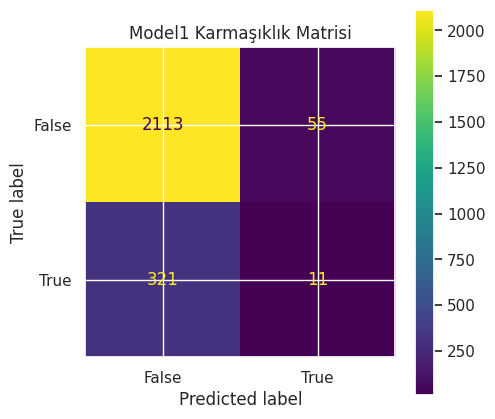

In [ ]:
#model1 için karmaşıklık matrisi 
#False=0 True=1
cf_matrix = confusion_matrix(y_class_test, np.round(y_class_pred))

fig,ax = plt.subplots(figsize=(5,5))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [False, True])
cm_display.plot(ax = ax)
plt.title("Model1 Karmaşıklık Matrisi")
plt.show()


**4.2 Sınıflandırma: İkinci Model**

In [ ]:
scaler = MinMaxScaler()
x_scale_train = scaler.fit_transform(x_class_train.astype(float))
x_scale_test = scaler.transform(x_class_test.astype(float))

In [ ]:
c_model2 = class_model(18,18, 'relu', 'sigmoid', 'adam','binary_crossentropy','accuracy')

c_model2.fit(x=x_scale_train, y=y_class_train,
          validation_data=(x_scale_test,y_class_test),
          batch_size=128,epochs=100)
c_model2.summary()

Epoch 1/100
59/59 [==============================] - 1s 4ms/step - loss: 0.4583 - accuracy: 0.8692 - val_loss: 0.3895 - val_accuracy: 0.8672
Epoch 2/100
59/59 [==============================] - 0s 3ms/step - loss: 0.3305 - accuracy: 0.8756 - val_loss: 0.3006 - val_accuracy: 0.8672
Epoch 3/100
59/59 [==============================] - 0s 2ms/step - loss: 0.2501 - accuracy: 0.8757 - val_loss: 0.2248 - val_accuracy: 0.8676
Epoch 4/100
59/59 [==============================] - 0s 2ms/step - loss: 0.1817 - accuracy: 0.9028 - val_loss: 0.1545 - val_accuracy: 0.9412
Epoch 5/100
59/59 [==============================] - 0s 2ms/step - loss: 0.1167 - accuracy: 0.9704 - val_loss: 0.0990 - val_accuracy: 0.9712
Epoch 6/100
59/59 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9847 - val_loss: 0.0679 - val_accuracy: 0.9864
Epoch 7/100
59/59 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.9917 - val_loss: 0.0477 - val_accuracy: 0.9920
Epoch 8/100
5

In [ ]:
# 2.model performansı
y_scale_pred = c_model2.predict(x_scale_test)

print('Accuracy:',metrics.accuracy_score(y_class_test, np.round(y_scale_pred)))

79/79 [==============================] - 0s 1ms/step
Accuracy: 1.0


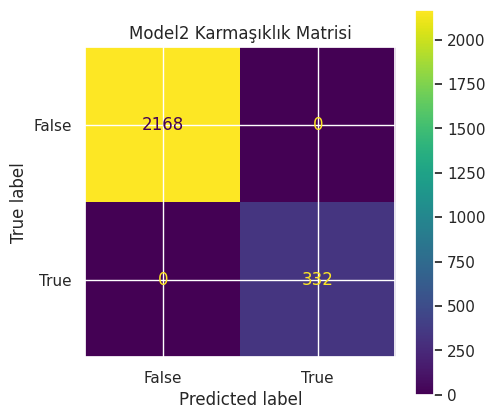

In [ ]:
#karmaşıklık matrisi sınıflandırma modeli 2
#False=0 True=1
cf_matrix2 = confusion_matrix(y_class_test, np.round(y_scale_pred))

fig,ax = plt.subplots(figsize=(5,5))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix2, display_labels = [False, True])
cm_display.plot(ax = ax)
plt.title("Model2 Karmaşıklık Matrisi")
plt.show()